# Titanic: Machine Learning From Disaster

## Part 1: The Data

To handle the data we're going to be using the `pandas` library. We're gonna run analysis on that data by leveraging `matplotlib`.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
# Import libraries
import pandas as pd

# Defining data for the dataframe
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Women and Children First

A first intuition might tell us that women and children have a higher than average chance of survival, it is "women and children first" when it comes to disasters after all. With that in mind, lets look at the distribution and see if we can make some conclusions. Let's first take a chance to explore Sex.

In [33]:
## Exploring sex

women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

print("% of women who survived:", rate_women)

men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print("% of men who survived:", rate_men)


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


Looking at this, we can see that while most of the women survived, very little men did. This gives us a hint that there is a very strong correlation between these two variables. We'll note it down and get back to this later. First I want to explore the `Age` part of the data.

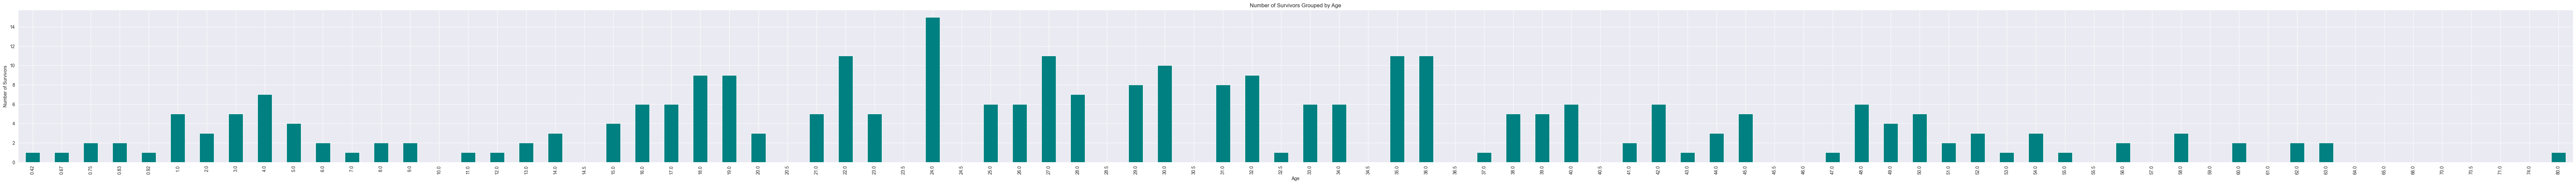

In [34]:
survival_counts = df.groupby('Age')['Survived'].sum()

plt.figure(figsize=(100, 6))
survival_counts.plot(kind='bar', color='teal')
plt.title('Number of Survivors Grouped by Age')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.grid(True)
plt.show()

Looking at the graph above does not show too much of a pattern. We do not see too much of a pattern. It does appear that young adults survived better than most, so let's group the people into categories to see if a pattern emerges. 

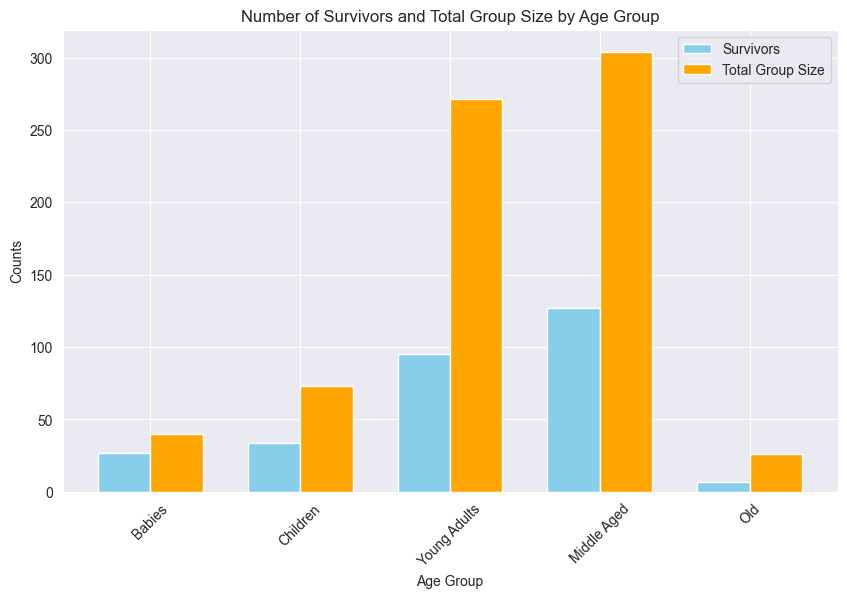

In [35]:
# Define age bins and labels
bins = [0, 5, 18, 30, 60, float('inf')]  # Adjust the boundaries as you see fit
labels = ['Babies', 'Children', 'Young Adults', 'Middle Aged', 'Old']

# Categorize each person into an age group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and sum the 'Survived' column and count total people
grouped = df.groupby('Age Group', observed=True)['Survived'].agg([("Survivors", "sum"), ("Total", "size")])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(labels))
bar_width = 0.35

rects1 = ax.bar(index, grouped['Survivors'], bar_width, label='Survivors', color='skyblue')
rects2 = ax.bar(index + bar_width, grouped['Total'], bar_width, label='Total Group Size', color='orange')

ax.set_xlabel('Age Group')
ax.set_ylabel('Counts')
ax.set_title('Number of Survivors and Total Group Size by Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

Looking at this new graph we can see that while most of the survivors are Young Adults and middle aged, those two also happen to be the largest groups. In fact, if we look at the percentage of each group that survived we can see that babies seems to have done the best even though it accounts for the least amount of survivors. But because I'm lazy and I want to make sure, I'm gonna look at the percentage of survivors per category.

In [36]:
# Calculate the percentage of survivors in each age group
grouped['Survival Rate (%)'] = (grouped['Survivors'] / grouped['Total']) * 100

# Print the survival rates
print(grouped['Survival Rate (%)'])

Age Group
Babies          67.500000
Children        46.575342
Young Adults    35.055351
Middle Aged     41.776316
Old             26.923077
Name: Survival Rate (%), dtype: float64


We can see our intuition was right. Over 2 thirds of the babies survived and as the passengers got older their chance to survive decreased. Oddly enough, we can see that middle aged spikes up instead of down, so we might want to take a look to try and see why this is. My intuition tells me that there may be a hidden correlation with the `money` variable (which isn't actually a variable in our dataset but we can infer based on the fare and passenger class).

Let's take some time to investigate this relationship.

### Wealthy people first

To start, lets try and confirm that middle aged people represent the wealthiest demographic we have. In order to that lets study the correlation between the age and passenger class (which we're using as a proxy for wealth).

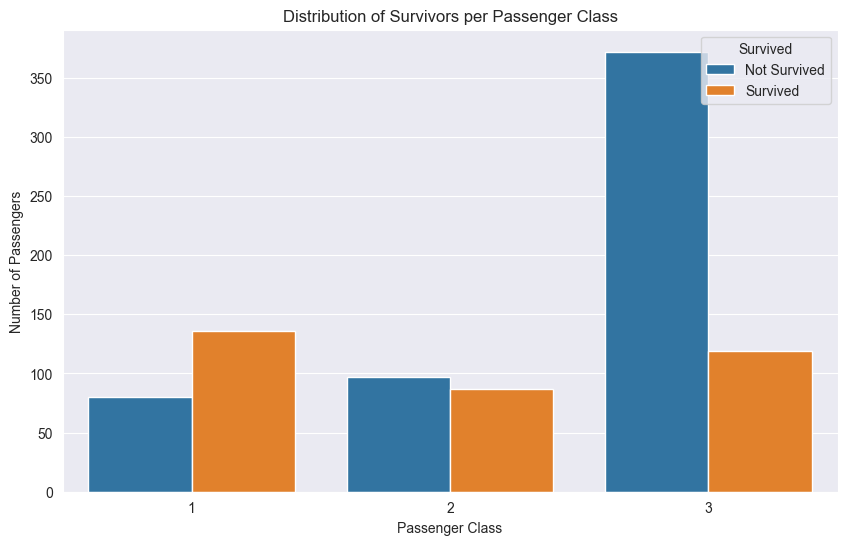

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a count plot to show the distribution of survivors per passenger class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')

# Set the title and labels
plt.title('Distribution of Survivors per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()

Right off the bat we can see that the class that had the most survival was first class. This is consistent with our hypothesis that wealthier people had a higher chance of survival. It would seem like this is also a good indicator for survival. I'm also interested in explaining the non-linear behavior we saw above, so lets take a look at the distribution of ages per class.

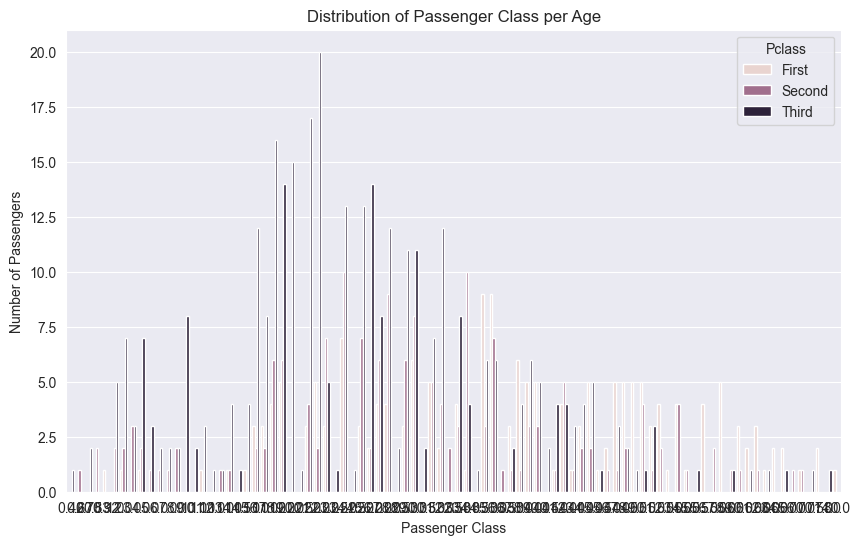

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Pclass')

plt.title('Distribution of Passenger Class per Age')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass', loc='upper right', labels=['First', 'Second', 'Third'])

plt.show()

Yikes, that's a very big graph. It seems like once again treating the ages as absolute values gives us a very unhelpful graph. We're going to group the ages again and see if we can see a pattern.

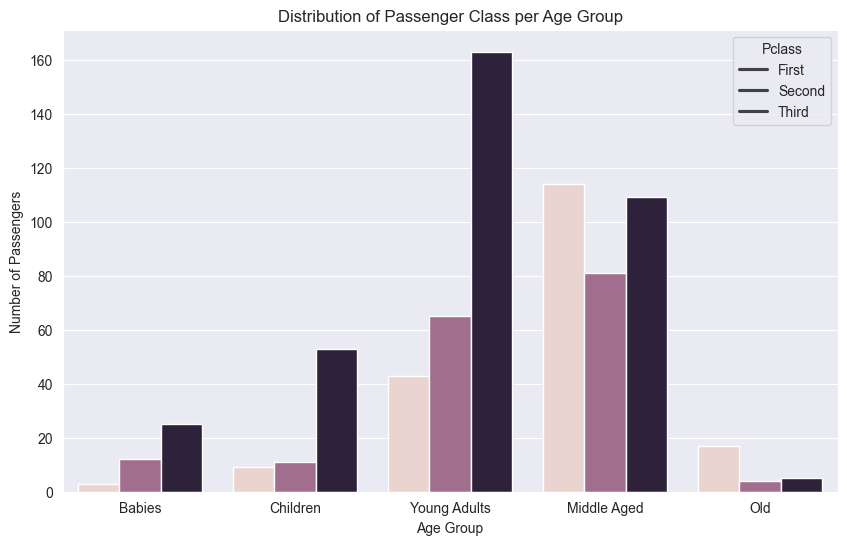

In [39]:
# Group by 'Age Group' and 'Pclass' and count the number of passengers in each group
grouped = df.groupby(['Age Group', 'Pclass'], observed=True).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Count', hue='Pclass')

plt.title('Distribution of Passenger Class per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass', loc='upper right', labels=['First', 'Second', 'Third'])

plt.show()

Well, this is interesting. We can see that the middle-aged group is mostly made up of first class passengers. This could explain why they have a higher than average survival rate. We can also see that the young adult group is mostly made up of third class passengers, which could explain why they have a lower than average survival rate. This is consistent with our hypothesis that wealthier people had a higher chance of survival.

### Looking for other avenues: p-value and pearson correlation

These hypothesis have been great, but we're actually wondering aimlessly through the data without any guide. To guide our further exploration we need to make proper analysis and to start we're going to look at the p-value matrix so that we can see how different values correlate to each other.

But first we need to do some treatment of the data. We have many non-numerical columns so we need to encode the data. For starters we're gonna create dummies, but we can take a look at other encodings (like one hot encoding) later if the need arises.

In [40]:
# numeric_df = pd.get_dummies(df)
# numeric_df

Well, that was naive. The issue is that some of our columns (more specifically `name` and `ticket`) give us way too many columns. Yikes.

So we're going to drop those columns and any others that give us issues.

In [41]:
numeric_df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
numeric_df = pd.get_dummies(numeric_df)
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age Group_Babies,Age Group_Children,Age Group_Young Adults,Age Group_Middle Aged,Age Group_Old
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True,False,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True,False,False,True,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True,False,False,True,False,False
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True,False,False,True,False,False
888,889,0,3,NaN,1,2,23.4500,True,False,False,False,True,False,False,False,False,False
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False,False,False,True,False,False


Now we have numbers. And with numbers we can start looking as the correlation between our data. We're going to start by looking at the Pearson correlation coefficient matrix. This will give us a good idea of what variables are correlated with each other. A huge caveat we need to take into account is that this only accounts for linear correlations, so if the relationship between to variables is more complex than that then we{re not going to see it here. But it's a good start.

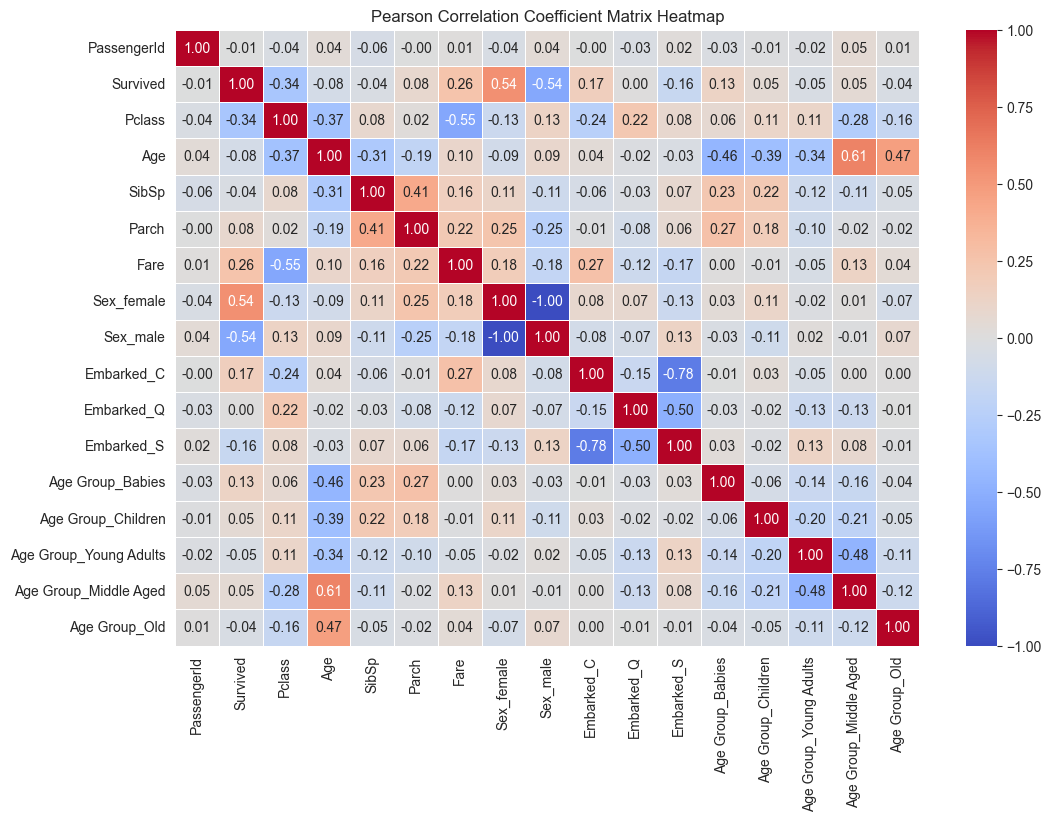

In [42]:
import seaborn as sns
from scipy.stats import pearsonr

# Get the numerical columns
numerical_columns = numeric_df.columns

# Calculate the Pearson correlation coefficient matrix
corr_matrix = pd.DataFrame(np.zeros((len(numerical_columns), len(numerical_columns))), columns=numerical_columns,
                           index=numerical_columns)

for row in numerical_columns:
    for col in numerical_columns:
        if row == col:
            corr_matrix.loc[row, col] = 1.0  # Perfect correlation with itself
        else:
            # Drop rows with NaN values in either column
            valid_data = numeric_df[[row, col]].dropna()
            if valid_data.shape[0] > 1:  # Ensure there are enough data points
                if valid_data[row].nunique() > 1 and valid_data[col].nunique() > 1:  # Ensure no constant arrays
                    corr, _ = pearsonr(valid_data[row], valid_data[col])
                    corr_matrix.loc[row, col] = corr
                else:
                    corr_matrix.loc[row, col] = np.nan  # One of the arrays is constant
            else:
                corr_matrix.loc[row, col] = np.nan  # Not enough data points

# Plotting the heatmap for Pearson correlation coefficients
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Pearson Correlation Coefficient Matrix Heatmap')
plt.show()

Looking at the matrix above we can see that the strongest correlations with our target variable are `Sex` (either male or female) and `Pclass` (the passenger class). We can also see that `Fare` and `Pclass` are also strongly correlated (-0.55), which is to be expected. So far, everything is consistent with the analysis we've done so far.

What really caught my attention here is that age does not seem to hold that much of a correlation with our target. Standing at just -0.08 it does not seem like this is great predictor of survival. But the analysis that we did above did seem to hint at younger groups (like babies) having a higher chance of survival. So what gives?

My gut tells me this might not be a _linear_ correlation. So we need to study this further (granted, there is a high chance I might be wrong). But its worth taking a look and discarding the hypothesis.

Given that patterns appeared to show themselves when we grouped the data, we're going to group the data in a similar way and look at the correlation between the groups. To do this we're gonna map this to a Monotonic function and calculate the Spearman correlation.

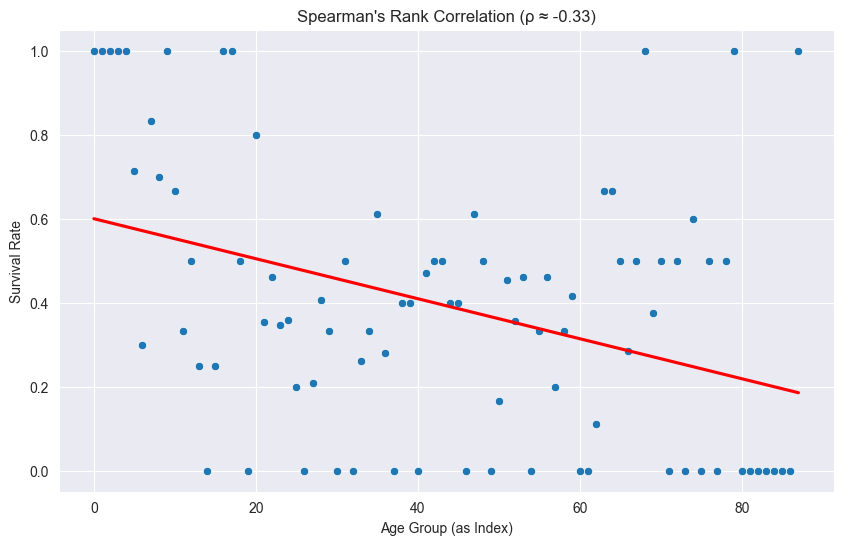

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Assuming 'df' is your DataFrame
# Group by 'Age Group' and 'Survived' and count total people
grouped = df.groupby('Age', observed=True)['Survived'].agg([("Survivors", "sum"), ("Total", "size")])

x = np.arange(len(grouped))
y = grouped['Survivors'] / grouped['Total']

# Calculate the Spearman correlation
spearman_corr, _ = spearmanr(x, y)

# Create DataFrame for plotting
plot_data = pd.DataFrame({'x': x, 'y': y})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=plot_data)
sns.regplot(x='x', y='y', data=plot_data, scatter=False, color='red', ci=None)

plt.title(f"Spearman's Rank Correlation (ρ ≈ {spearman_corr:.2f})")
plt.xlabel('Age Group (as Index)')
plt.ylabel('Survival Rate')
plt.show()


### Treating missing values

We've done a lot of analysis so far, but we've been ignoring the elephant in the room: missing values. We need to treat these before we can move on with our analysis. We're going to start by looking at the columns that have missing values.

In [44]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age          177
Cabin        687
Embarked       2
Age Group    177
dtype: int64

Yikes, that's a lot. So we're going to have to treat these missing values before we can move on. Because different data means different things, we're gonna need to treat the values differently:
1. For `Age` we're going to fill in the missing values with the median age.
2. For `Embarked` we're going to fill in the missing values with the most common value.
3. For `Cabin` we're going to turn the column into a binary column that indicates if the value was missing or not. This is because I believe its more interesting to check wether the passenger had a cabin or not than to know the cabin number.

In [45]:
df_clean = df.copy()

# Fill missing values in 'Age' with the median age
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# Fill missing values in 'Embarked' with the most common value
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

# Create a new column 'Has Cabin' to indicate if the passenger had a cabin
df_clean['Has Cabin'] = df_clean['Cabin'].notnull().astype(int)

# Drop the 'Cabin' column
df_clean = df_clean.drop('Cabin', axis=1)

df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adults,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle Aged,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adults,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle Aged,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle Aged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Young Adults,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Young Adults,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Young Adults,1


We're gonna need to recompute our `Age Group` column now.

In [46]:
complete_df = df_clean.copy()

# Recompute Age Group column
complete_df['Age Group'] = pd.cut(complete_df['Age'], bins=bins, labels=labels, right=False)

complete_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adults,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle Aged,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adults,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle Aged,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle Aged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Young Adults,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Young Adults,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Young Adults,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Young Adults,1


# Running our model to make predictions

So now that we have everything setup we're gonna run a model to make predictions. We're gonna use a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model to make predictions. First, we're going to choose to keep only the columns that we believe are relevant to the model. We're going to keep the following columns:
- `Pclass`
- `Sex`
- `Age Group`
- `Fare` 

In [47]:
data = complete_df[['Pclass', 'Sex', 'Age Group', 'Fare', 'Survived', 'Has Cabin']]

data

,Pclass,Sex,Age Group,Fare,Survived,Has Cabin
0,3,male,Young Adults,7.2500,0,0
1,1,female,Middle Aged,71.2833,1,1
2,3,female,Young Adults,7.9250,1,0
3,1,female,Middle Aged,53.1000,1,1
4,3,male,Middle Aged,8.0500,0,0
...,...,...,...,...,...,...
886,2,male,Young Adults,13.0000,0,0
887,1,female,Young Adults,30.0000,1,1
888,3,female,Young Adults,23.4500,0,0
889,1,male,Young Adults,30.0000,1,1


Next we need to turn all of our columns into numbers so that the model can work with it.

In [48]:
normalized_data = pd.get_dummies(data)
normalized_data

,Pclass,Fare,Survived,Has Cabin,Sex_female,Sex_male,Age Group_Babies,Age Group_Children,Age Group_Young Adults,Age Group_Middle Aged,Age Group_Old
0,3,7.2500,0,0,False,True,False,False,True,False,False
1,1,71.2833,1,1,True,False,False,False,False,True,False
2,3,7.9250,1,0,True,False,False,False,True,False,False
3,1,53.1000,1,1,True,False,False,False,False,True,False
4,3,8.0500,0,0,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,0,0,False,True,False,False,True,False,False
887,1,30.0000,1,1,True,False,False,False,True,False,False
888,3,23.4500,0,0,True,False,False,False,True,False,False
889,1,30.0000,1,1,False,True,False,False,True,False,False


In [52]:
# Split the data into features and target
X = normalized_data.drop('Survived', axis=1)
y = normalized_data['Survived']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Calculate errors

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7932960893854749

That looks good, 80%. I think we probably can do better, but this seems like a good start don't you think? Let's take a look at the confusion matrix to see where we're making mistakes.

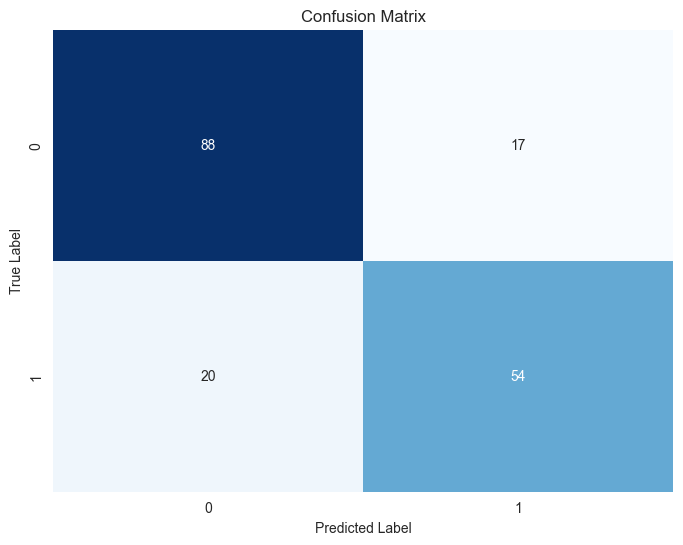

In [53]:
# Calculate the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
# Calculate the classification report

from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



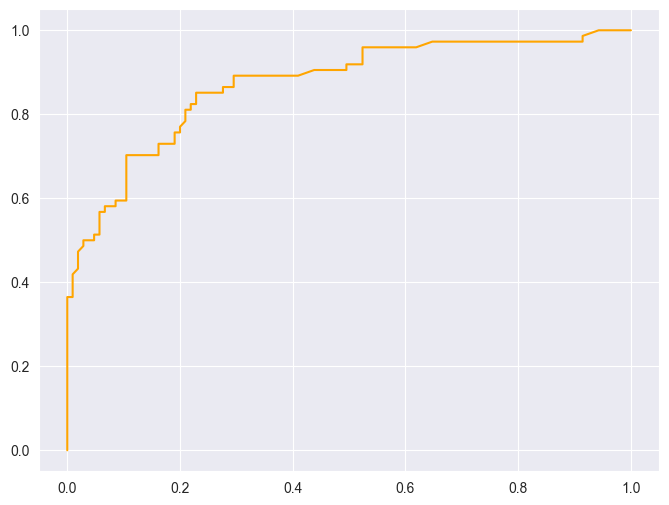

In [55]:
# Calculate the ROC curve

from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange')